In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as ms
sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.drop(['id'],axis=1, inplace=True)

In [7]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

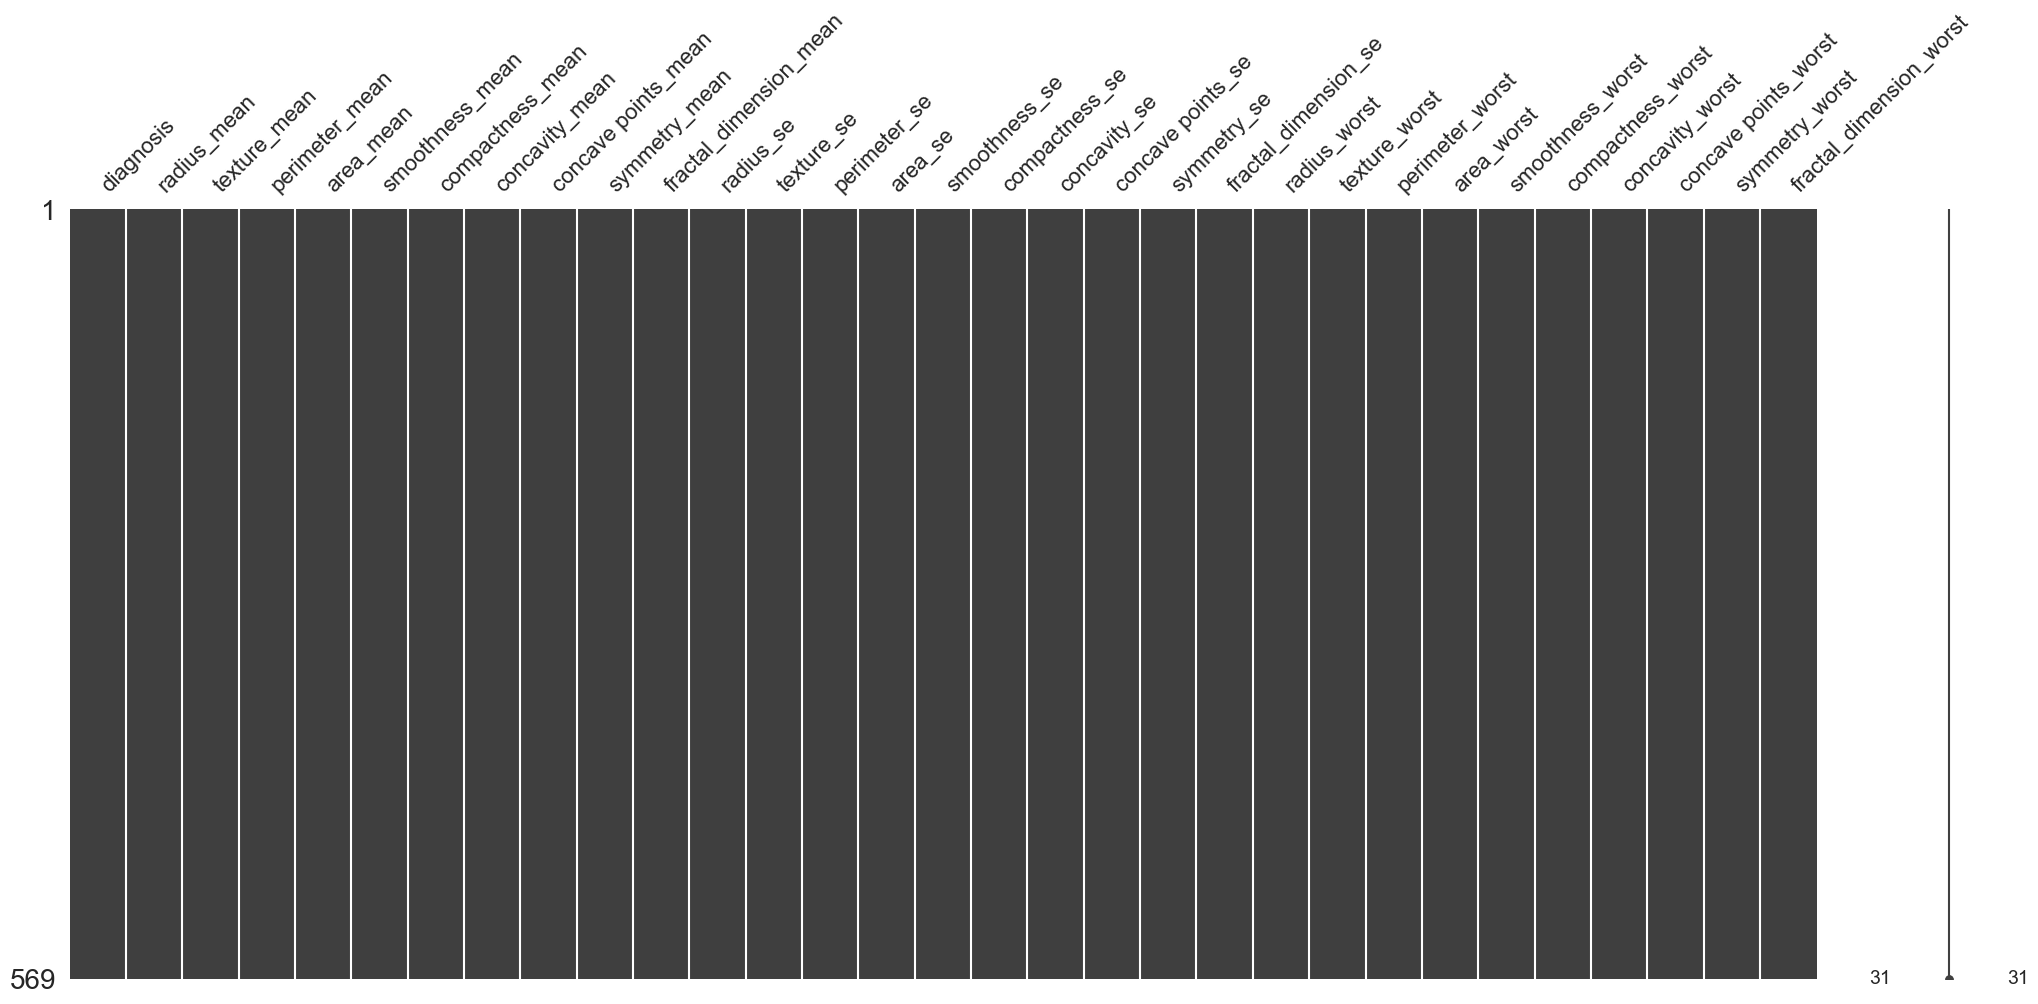

In [8]:
ms.matrix(data)

In [9]:
data.shape

(569, 31)

<Axes: xlabel='diagnosis', ylabel='count'>

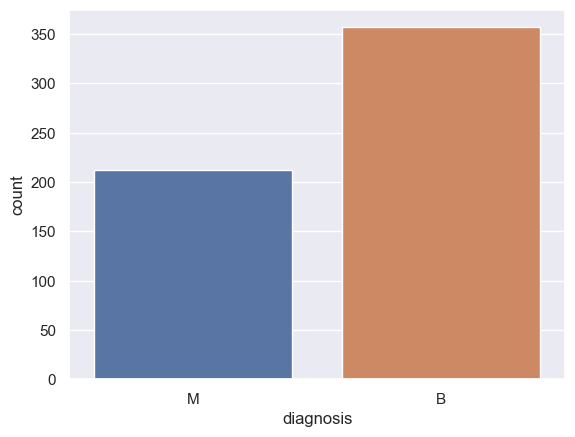

In [10]:
sns.countplot(data=data, x = 'diagnosis')

In [11]:
m = data['diagnosis'].value_counts()['M']
b = data['diagnosis'].value_counts()['B']

In [12]:
m, b

(212, 357)

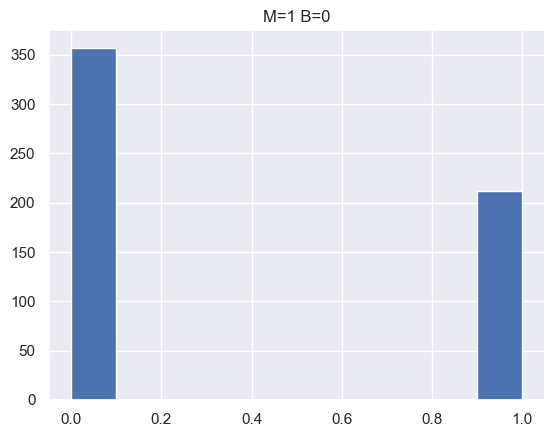

In [13]:
data['diagnosis'] = data['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
plt.hist(data['diagnosis'])
plt.title('M=1 B=0')
plt.show()

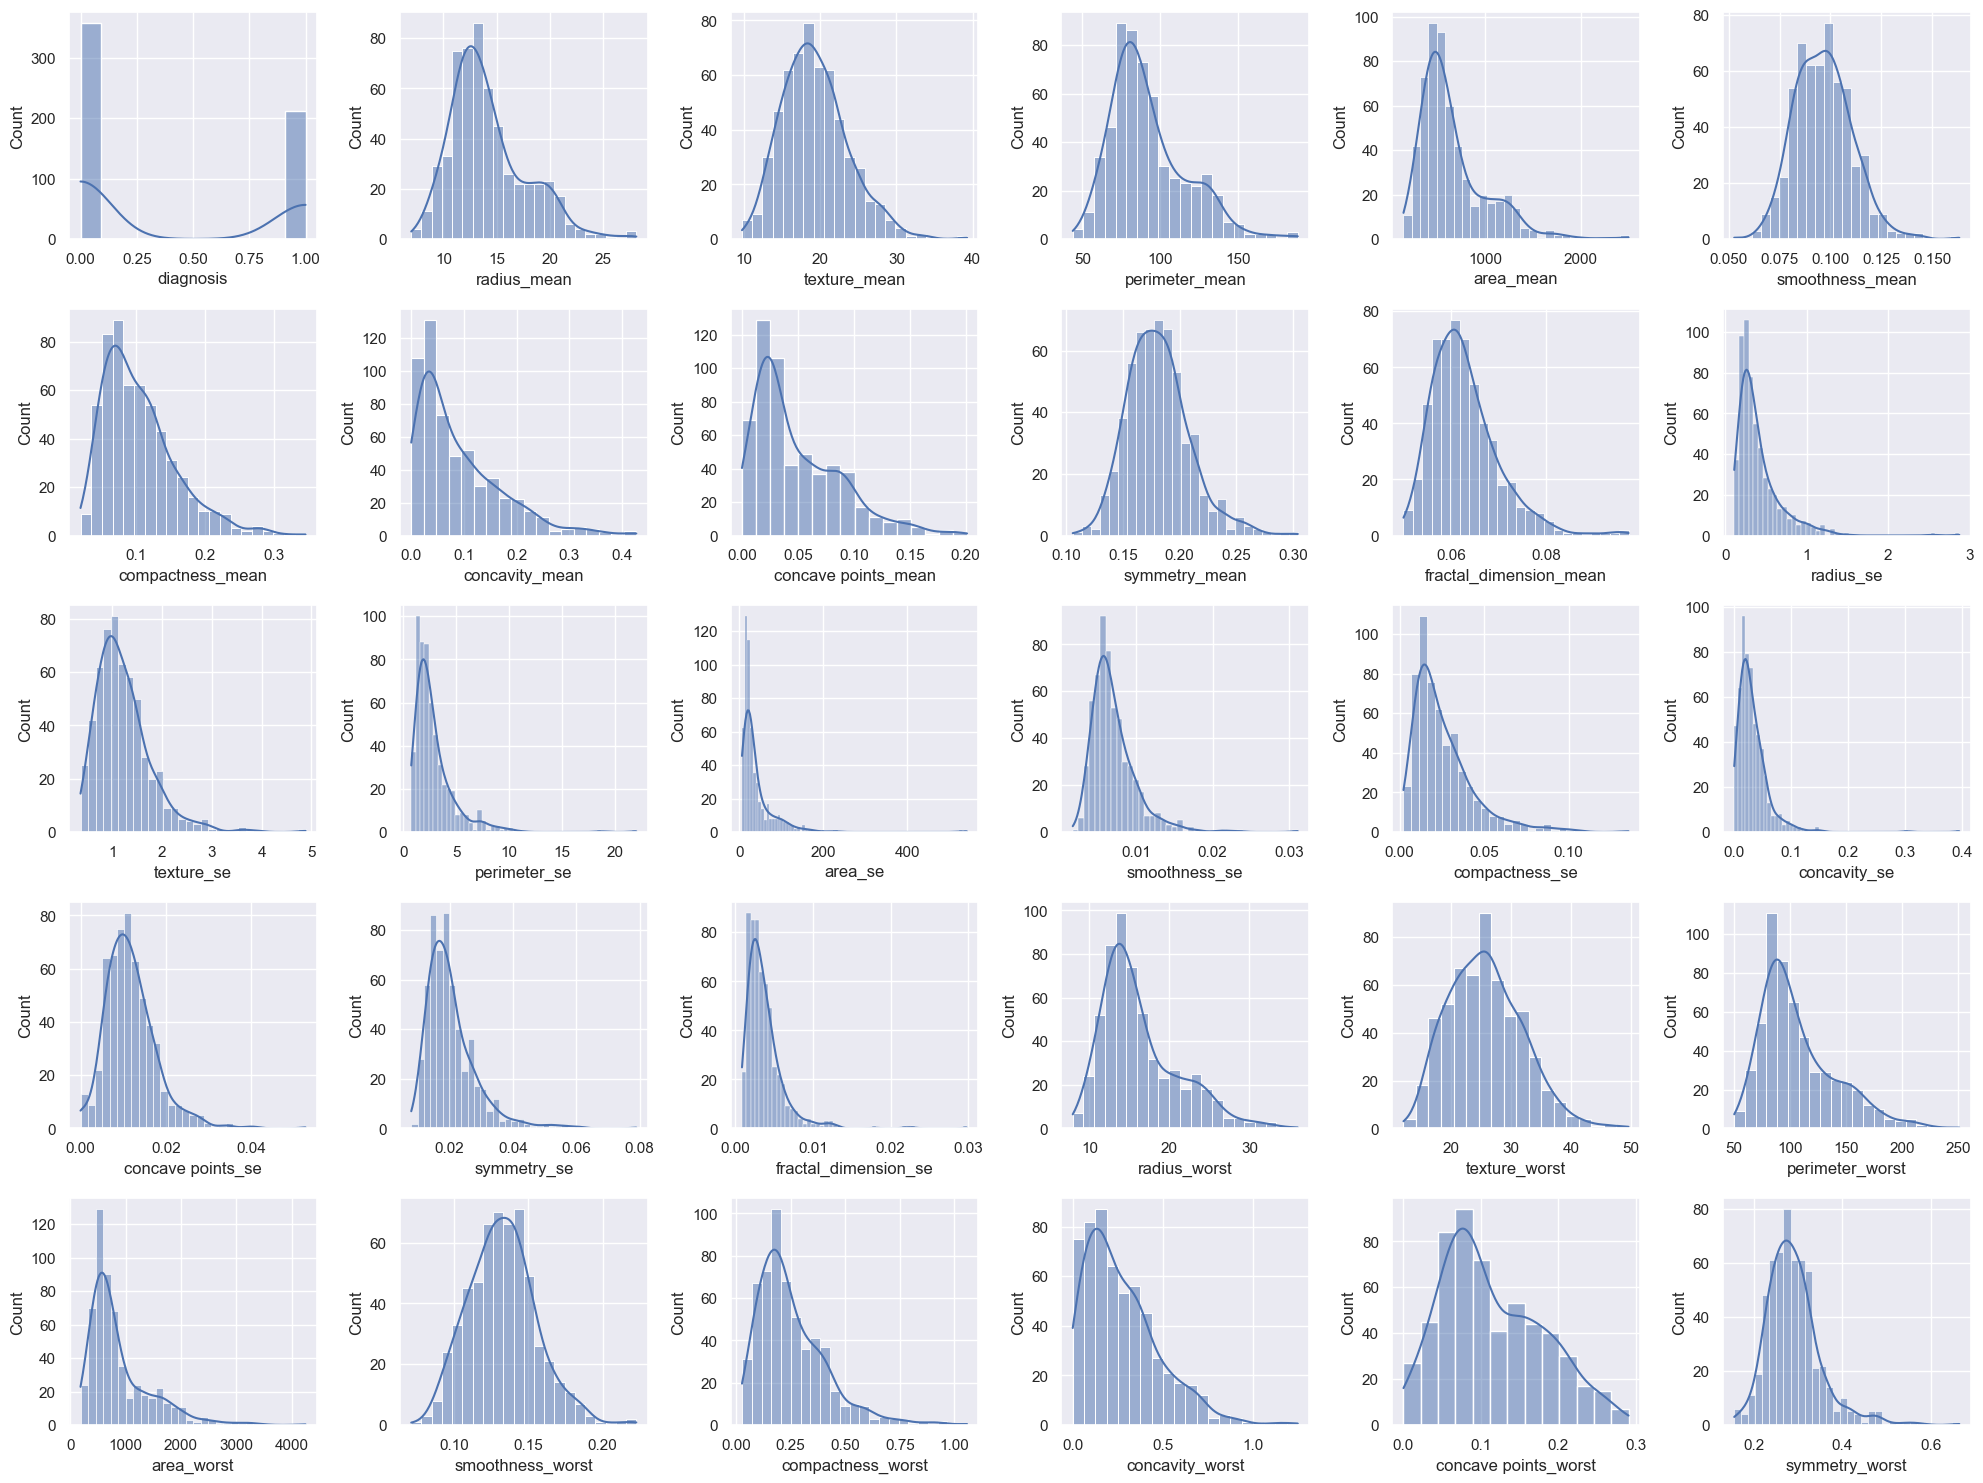

In [14]:
plt.figure(figsize=(20, 15))
plots = 1

for column in data:
    if plots <= 30:
        plt.subplot(5, 6, plots)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column)
    plots += 1

plt.tight_layout()
plt.show()

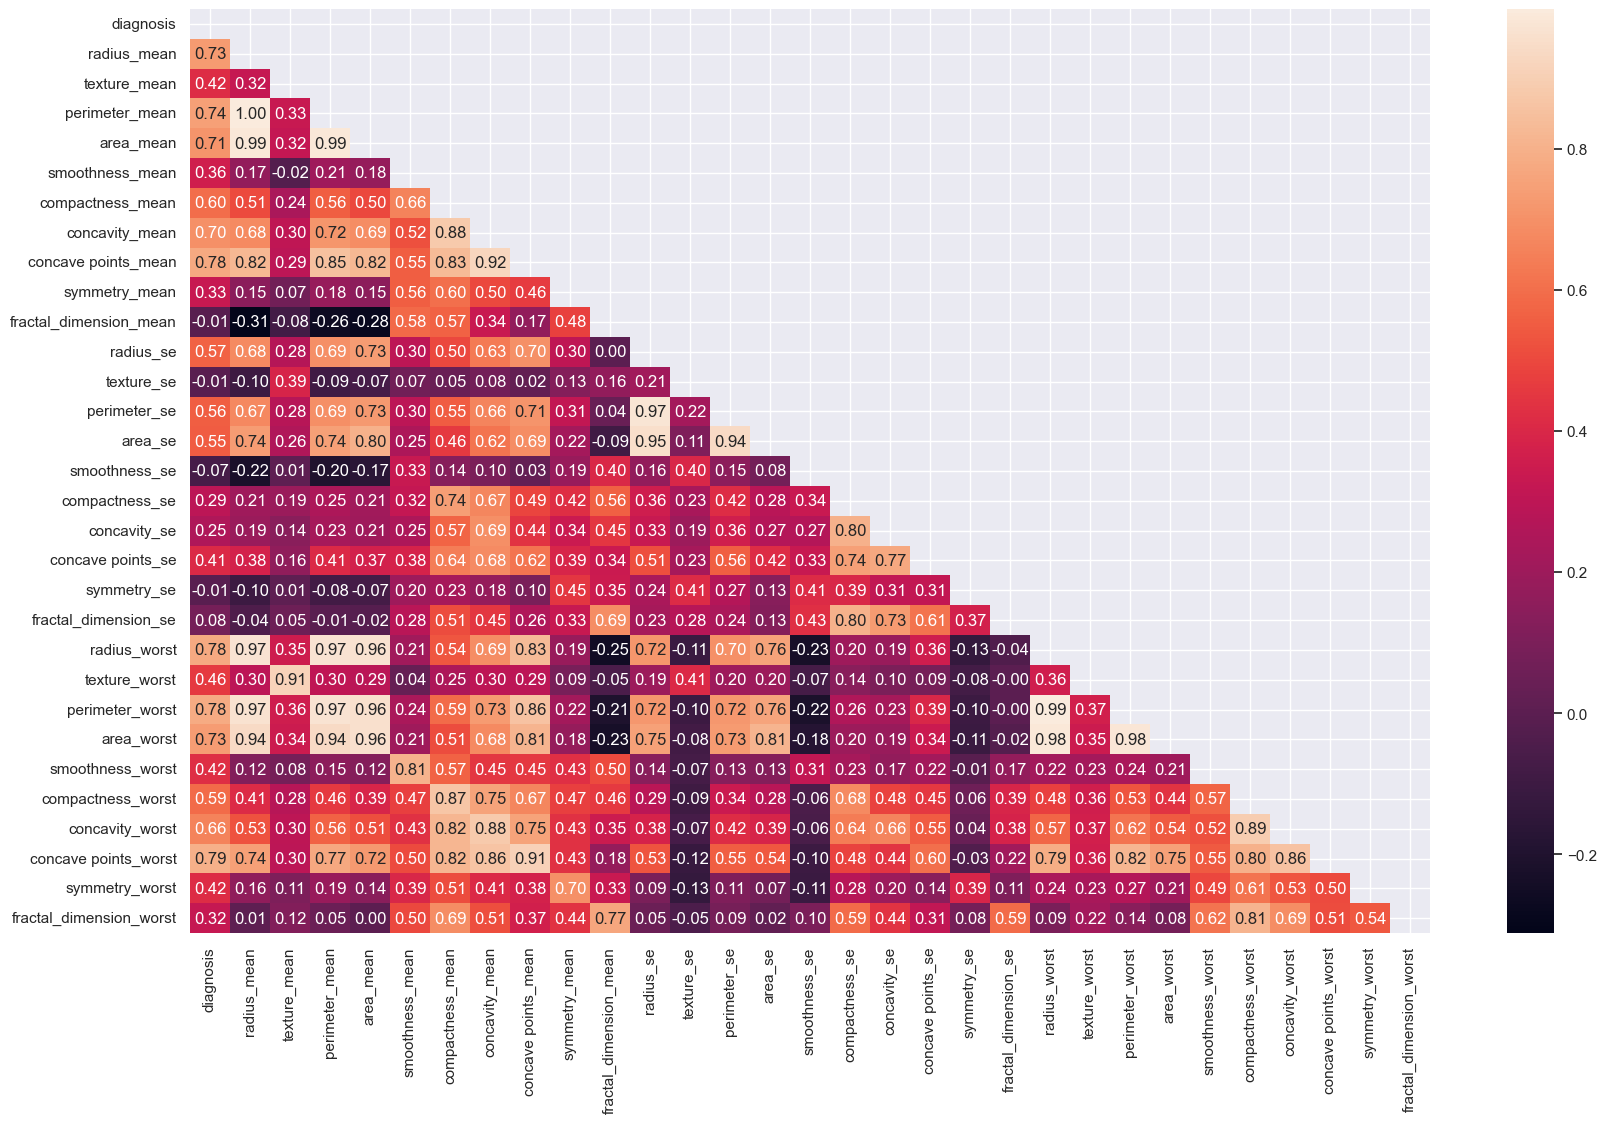

In [15]:
plt.figure(figsize = (20,12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")
plt.show()

In [16]:
df = data

In [17]:

# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [19]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

In [21]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


In [28]:
print(confusion_matrix(y_test, y_pred))

[[106   2]
 [  5  58]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test)

In [32]:
print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9623115577889447
0.935672514619883


In [33]:
print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  8  55]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [36]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [37]:
grid_search.best_score_

0.9774683544303798

In [38]:
svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [39]:
y_pred = svc.predict(X_test)

In [40]:
print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9874371859296482
0.9766081871345029


In [41]:
print(confusion_matrix(y_test, y_pred))

[[107   1]
 [  3  60]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [45]:
grid_search_dt.best_score_

0.959873417721519

In [46]:

dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [47]:
y_pred = dtc.predict(X_test)

In [49]:
print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.957286432160804
0.9298245614035088


In [50]:
print(confusion_matrix(y_test, y_pred))

[[100   8]
 [  4  59]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       108
           1       0.88      0.94      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [54]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [55]:
y_pred = rand_clf.predict(X_test)

In [56]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9949748743718593
0.9649122807017544


In [57]:
print(confusion_matrix(y_test, y_pred))

[[106   2]
 [  4  59]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\Users\Anshika\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Anshika\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anshika\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Anshika\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Anshika\anaconda3\Lib\site-

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [66]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [67]:
grid_search_gbc.best_score_

0.9447236180904522

In [68]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [69]:

y_pred = gbc.predict(X_test)

In [70]:
print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.9649122807017544


In [71]:
print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  3  60]]


In [72]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [73]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,97.66
4,Random Forest Classifier,96.49
5,Gradient Boosting Classifier,96.49
0,Logistic Regression,95.91
1,KNN,93.57
3,Decision Tree Classifier,92.98
